신용주님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

###🕹️ Data Description
*   Name : 게임의 이름입니다.
*   Platform : 게임이 지원되는 플랫폼의 이름입니다.
*   Year : 게임이 출시된 연도입니다.
*   Genre : 게임의 장르입니다.
*   Publisher : 게임을 배급한 회사입니다.
*   NA_Sales : 북미지역에서의 출고량입니다.
*   EU_Sales : 유럽지역에서의 출고량입니다.
*   JP_Sales : 일본지역에서의 출고량입니다.
*   Other_Sales : 기타지역에서의 출고량입니다.



##Goal of project
### 다음 분기에 어떤 게임을 설계해야 할까

###반드시 들어가야 하는 내용. 


1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.



In [44]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# 데이터를 불러옴
df=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col=0)

### 1. 데이터 확인

In [9]:
# 데이터를 확인
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [10]:
# 언제든 원본데이터를 다시 불러와서 사용하도록 copy생성
df_copy=df.copy()
# 복사가 잘 되었는지 데이터 샘플 확인
df_copy.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [11]:
# 데이터 정보확인
# 16598 로우 9 컬럼 
# year , genre , publisher 결측치 발견 
# year 에 소숫점 제거 및 타입변경 필요 
# 판매량이 object type -> float 로 변경 필요
# 판매량에 K 문자열이 존재 -> *1000 으로 변경 , M존재 * 1,000,000 변경
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [12]:
# 데이터의 열, 행 수를 확인
df_copy.shape

(16598, 9)

In [13]:
# 데이터의 차원을 확인
df_copy.ndim

2

In [14]:
# 판매량 컬럼 문자열 확인
df[df['NA_Sales'].str.contains('K','M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


### 2. 결측치 및 이상치 확인

In [15]:
# 결측치 갯수 확인
df_copy.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [18]:
# year 결측치 확인-> 271개의 결측치 
# 데이터자체를 확인해보니 대체가 불가능할 것으로 보여서, 제거
df_copy[df_copy['Year'].isnull()].info()
df_copy[df_copy['Year'].isnull()].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 32 to 16433
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         271 non-null    object 
 1   Platform     271 non-null    object 
 2   Year         0 non-null      float64
 3   Genre        271 non-null    object 
 4   Publisher    249 non-null    object 
 5   NA_Sales     271 non-null    object 
 6   EU_Sales     271 non-null    object 
 7   JP_Sales     271 non-null    object 
 8   Other_Sales  271 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.2+ KB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [19]:
# Genre 결측치 확인 , 대체는 불가능 
df_copy[df_copy['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [20]:
#결측치 제거 
df_copy=df_copy.dropna().reset_index(drop=True)
df_copy.shape

(16241, 9)

In [21]:
# 중복데이터 확인
df_copy.duplicated().sum()

0

In [23]:
#출시년도를 인티저타입으로 변경 
#결측치 제거시 사용하기위해 인티저로 변경했다가 추후 스트링 변경
df_copy['Year']=df_copy['Year'].astype(int)

In [25]:
# 각 값의 숫자를 확인, 연도값이 이상하거나 값이 매우 적은 년도를 확인 
df_copy['Year'].value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
        ... 
13         2
12         2
86         1
2020       1
94         1
Name: Year, Length: 62, dtype: int64

In [26]:
# 출시년도 데이터 확인 1950년도 이전에는 게임이 없었으므로 그 보다 작은수는 이상치로 판단 
# 규칙이 90이하는 2000년대, 90이상은 1990년대로 판단됨 , 샘플 구글 검색 결과 
df_copy[df_copy['Year']<1950]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15641,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15756,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15801,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16042,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [27]:
# year 값이 50보다 작으면 2000을 더하고 , 크고 100보다 작으면 1900을더하고 , 그외는 그대로 리턴
def year(x):
  if x < 50:
    x= x+2000
    return x
  elif 100> x > 50:
    x= x+1900
    return x
  else:
    return x

In [28]:
# year에 위에서 정의한 함수를 적용하고 스트링타입으로 변경, 추후 그룹화를 위해서 
df_copy['Year']=df_copy['Year'].apply(year)

In [29]:
# 연도를 통일한 뒤 숫자를 확인, 매우적은 값이 존재 
df_copy['Year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [31]:
# 매우적은 값을 삭제해줌
y80= df_copy[df_copy['Year']==1980].index
y17 = df_copy[df_copy['Year']==2017].index
y20 = df_copy[df_copy['Year']==2020].index
df_copy = df_copy.drop(y80)
df_copy = df_copy.drop(y17)
df_copy = df_copy.drop(y20)

In [32]:
# 스트링타입으로 변환, 계산에 이용하지 않는 고유값
df_copy['Year'].astype(str)

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16229, dtype: object

In [43]:
# 플랫폼 정보확인 
df_copy['Platform'].value_counts()

DS      2126
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      407
PS4      334
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     107
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [33]:
# 행 보기 옵션 변경 , 500개
pd.set_option('display.max_rows', 500)

In [34]:
# 판매량 값의 문자열 제거를 위해 데이터프레임을 나눠줌
error_names = df_copy[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [35]:
# K,M 문자열을 1,000, 1,000,000 으로 치환
error_names=error_names.replace(['K','M'],['*0.001',''],regex=True)

In [36]:
# * 기준으로 행을 나눠서 연산을 진행
error_names['1'] = error_names.NA_Sales.str.split('*').str[0].astype(float)
error_names['2'] = error_names.NA_Sales.str.split('*').str[1].astype(float)
error_names['3'] = error_names.EU_Sales.str.split('*').str[0].astype(float)
error_names['4'] = error_names.EU_Sales.str.split('*').str[1].astype(float)
error_names['5'] = error_names.JP_Sales.str.split('*').str[0].astype(float)
error_names['6'] = error_names.JP_Sales.str.split('*').str[1].astype(float)
error_names['7'] = error_names.Other_Sales.str.split('*').str[0].astype(float)
error_names['8'] = error_names.Other_Sales.str.split('*').str[1].astype(float)
error_names=error_names.iloc[:,4:]

In [37]:
# 나누면서 K,M이 없던 셀에는 NAN값이 생기므로 해당값을 곱해도 기존값이 되도록 1로 채워줌
error_names=error_names.fillna(1)

In [38]:
# 나눈 행을 곱해서 K,M을 숫자로 변환해줌
error_names['NA_Sales']=error_names['1']*error_names['2']
error_names['EU_Sales']=error_names['3']*error_names['4']
error_names['JP_Sales']=error_names['5']*error_names['6']
error_names['Other_Sales']=error_names['7']*error_names['8']

In [39]:
# 필요없는 컬럼은 인덱싱해서 제거 
error_names=error_names.iloc[:,8:]

In [40]:
# 기존 세일즈 정보를 삭제 
df_copy=df_copy.iloc[:,:-4]

In [41]:
# 문자열을 변환한 새로운 판매량데이터를 붙여줌
df_copy=df_copy.join(error_names)

In [42]:
# 판매량 정보 변환 완료 
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 3. Feature Extraction

In [46]:
# 전체 판매량 컬럼 생성
df_copy['Total_Sales']=df_copy[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [47]:
# 전체 판매량 피처 생성 후 통계값 확인
# 각 판매량 별 통계치 확인
df_copy.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16237.000000,16237.000000,16237.000000,16237.000000,16237.000000,16237.000000
mean,2006.403954,0.265244,0.147415,0.078299,0.048245,0.539202
std,5.830051,0.822524,0.508397,0.309308,0.189700,1.564080
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# 클러스터링


In [ ]:
# 엘보우 메소드

In [ ]:
# 클러스터링 시각화

In [ ]:
# 각 클러스터 해석

### 5. 통계 검정

In [ ]:
# 데이터의 분산 확인

In [ ]:
# 데이터 간의 상관관계 확인

In [ ]:
Action=df_copy[df_copy['Genre']== 'Action']['NA_Sales']
Others=df_copy[df_copy['Genre']!= 'Action']['NA_Sales']

In [ ]:
# 통계적으로 다른장르보다 유의미하게 크지는 않다.
Ac=scipy.stats.ttest_ind(Action,Others,alternative='greater')
pv=Ac.pvalue
print(format(pv,'.8f'))

0.50358074


### 6. 시각화 

In [49]:
# 제일 잘팔린 게임 30개 보기
df_copy.sort_values(by='Total_Sales',ascending=False).head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2959,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [50]:
# 장르별 총 판매액 내림차순으로 정렬 
Genre=df_copy.groupby('Genre').sum().sort_values(by='Total_Sales',ascending=False)
Genre

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,6503600,858.75,513.64,156.59,183.99,1712.97
Sports,4610619,667.26,370.97,134.76,132.35,1305.34
Shooter,2567579,574.48,310.23,38.18,101.86,1024.75
Role-Playing,2936305,318.76,183.09,342.89,56.73,901.47
Platform,1749321,445.38,200.63,130.53,51.45,827.99
Misc,3374273,394.73,208.15,104.18,72.64,779.70
Racing,2443902,354.70,235.02,56.32,76.51,722.55
Fighting,1673860,220.35,99.90,87.14,36.15,443.54
Simulation,1695520,181.16,112.99,63.54,31.30,388.99


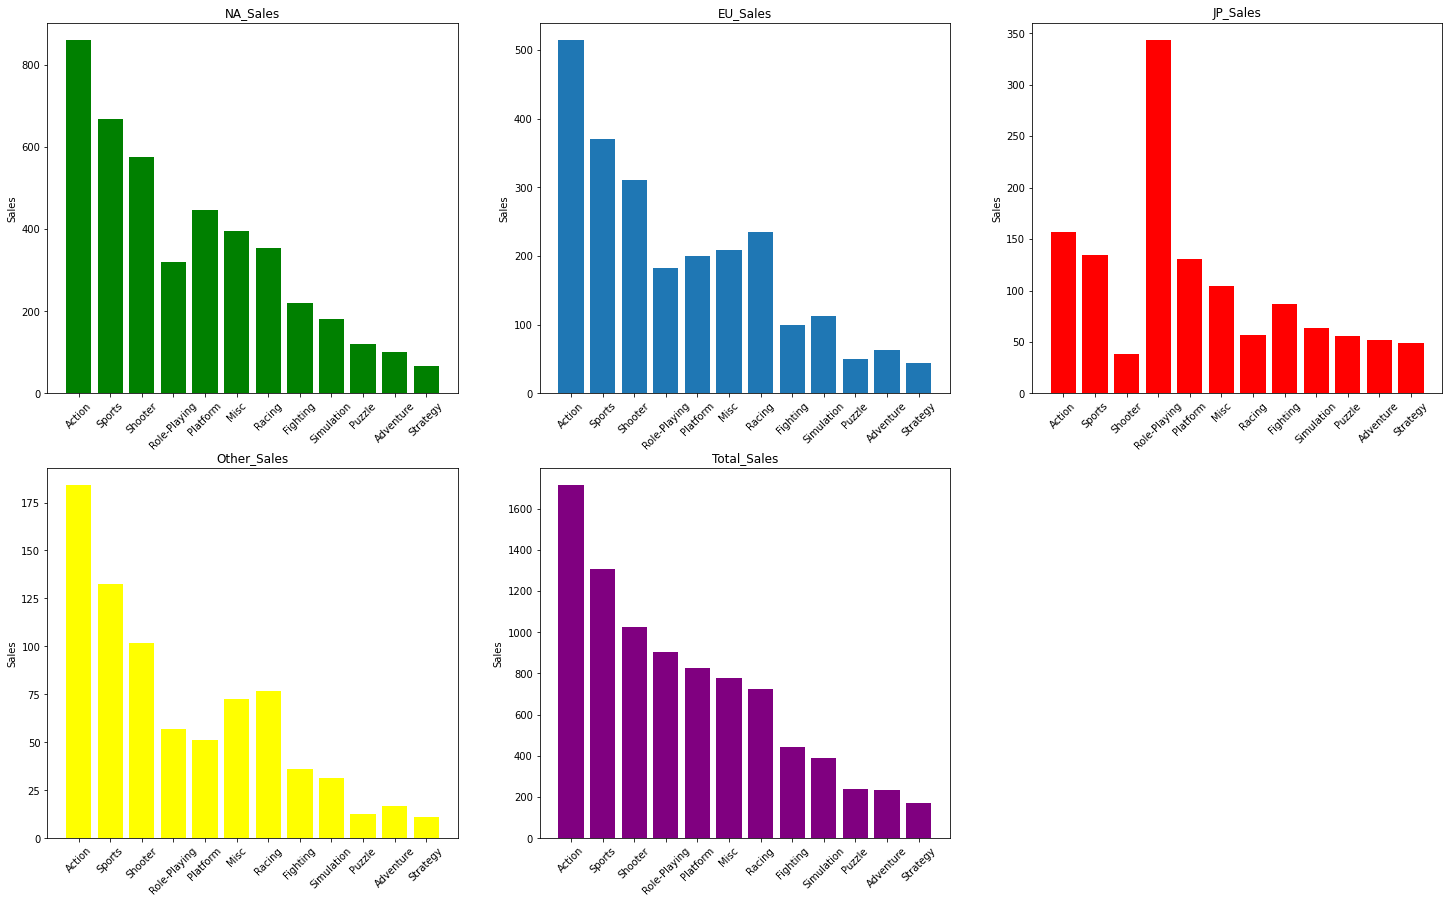

In [51]:
plt.figure(figsize=[25,15])

plt.subplot(2, 3, 1)
plt.bar(Genre.index, Genre['NA_Sales'],color='Green')
plt.title('NA_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
plt.bar(Genre.index, Genre['EU_Sales'])
plt.title('EU_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.bar(Genre.index, Genre['JP_Sales'],color='red')
plt.title('JP_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
plt.bar(Genre.index, Genre['Other_Sales'],color='yellow')
plt.title('Other_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
plt.bar(Genre.index, Genre['Total_Sales'],color='purple')
plt.title('Total_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.show()

In [52]:
# 각 장르별 판매액 평균을 지역별로 나눠서 저장
mean=df_copy.groupby('Genre').mean()
mean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2007.903674,0.265128,0.158580,0.048345,0.056805,0.528858
Adventure,2008.126183,0.080276,0.050205,0.040907,0.013170,0.184558
Fighting,2004.622754,0.263892,0.119641,0.104359,0.043293,0.531186
Misc,2007.301011,0.234819,0.123825,0.061975,0.043212,0.463831
Platform,2003.804124,0.510172,0.229817,0.149519,0.058935,0.948442
Puzzle,2005.227915,0.214806,0.089170,0.099364,0.021979,0.425318
Racing,2004.841674,0.290976,0.192797,0.046202,0.062765,0.592740
Role-Playing,2007.043746,0.217881,0.125147,0.234375,0.038776,0.616179
Shooter,2005.921094,0.448813,0.242367,0.029828,0.079578,0.800586


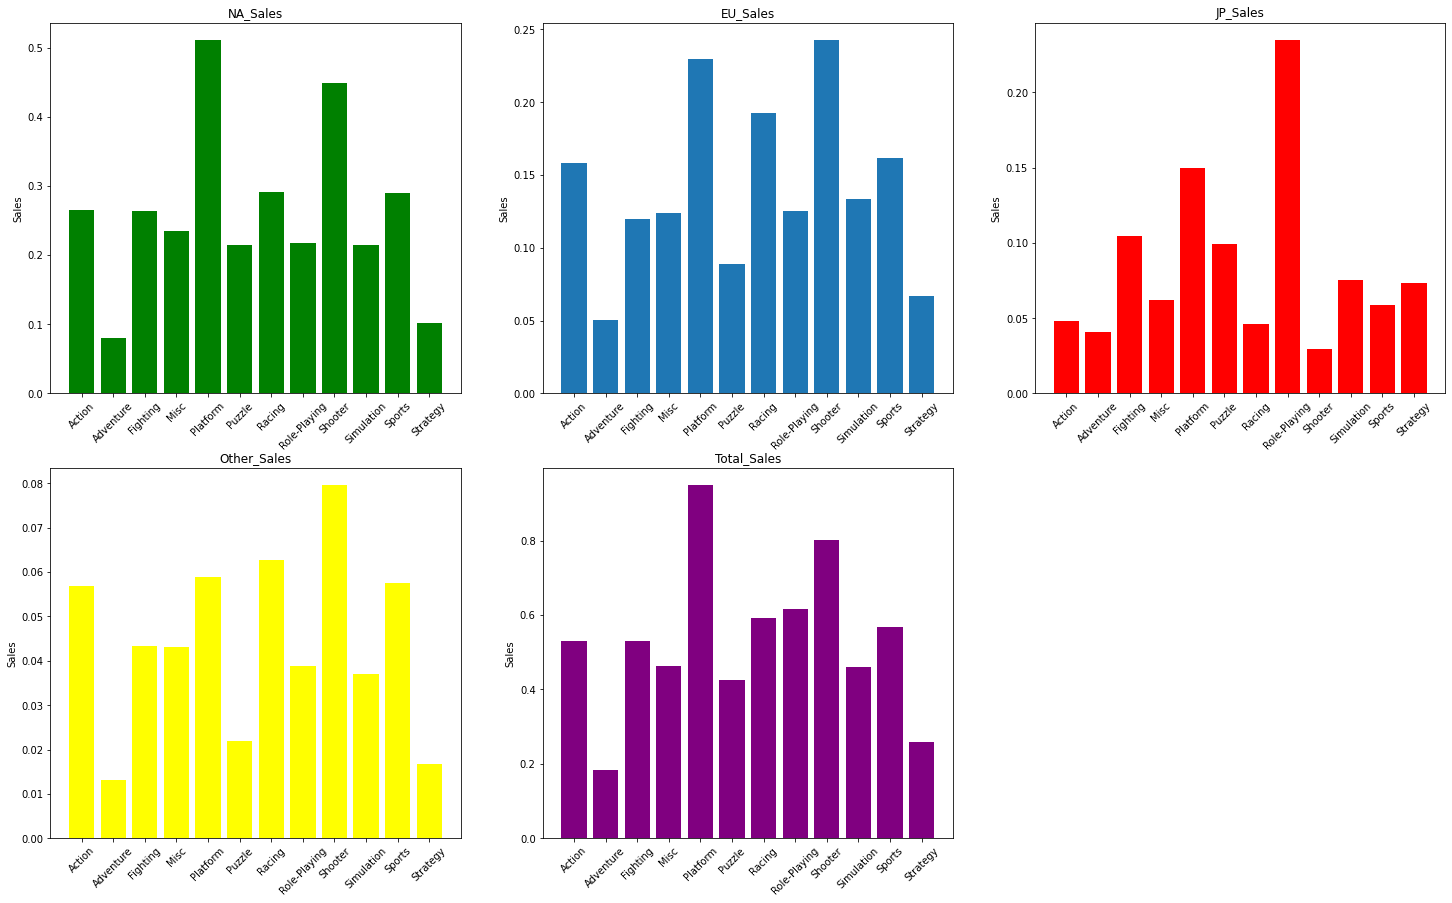

In [53]:
plt.figure(figsize=[25,15])

plt.subplot(2, 3, 1)
plt.bar(mean.index, mean['NA_Sales'],color='Green')
plt.title('NA_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
plt.bar(mean.index, mean['EU_Sales'])
plt.title('EU_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.bar(mean.index, mean['JP_Sales'],color='red')
plt.title('JP_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
plt.bar(mean.index, mean['Other_Sales'],color='yellow')
plt.title('Other_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
plt.bar(mean.index, mean['Total_Sales'],color='purple')
plt.title('Total_Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.show()

In [54]:
# 년도별 장르의 출시 게임 수 확인
year=df_copy.groupby(['Year','Genre'])['Total_Sales'].count().reset_index()
year_max = year.groupby(by=['Year'])['Total_Sales'].transform(max) == year['Total_Sales']
year_count_max = year[year_max].reset_index(drop=True)
year_count_max= year_count_max.drop_duplicates(subset='Year')
year_count_max

,Year,Genre,Total_Sales
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
7,1985,Platform,4
9,1986,Action,6
11,1987,Sports,4
12,1988,Platform,4
13,1989,Puzzle,5


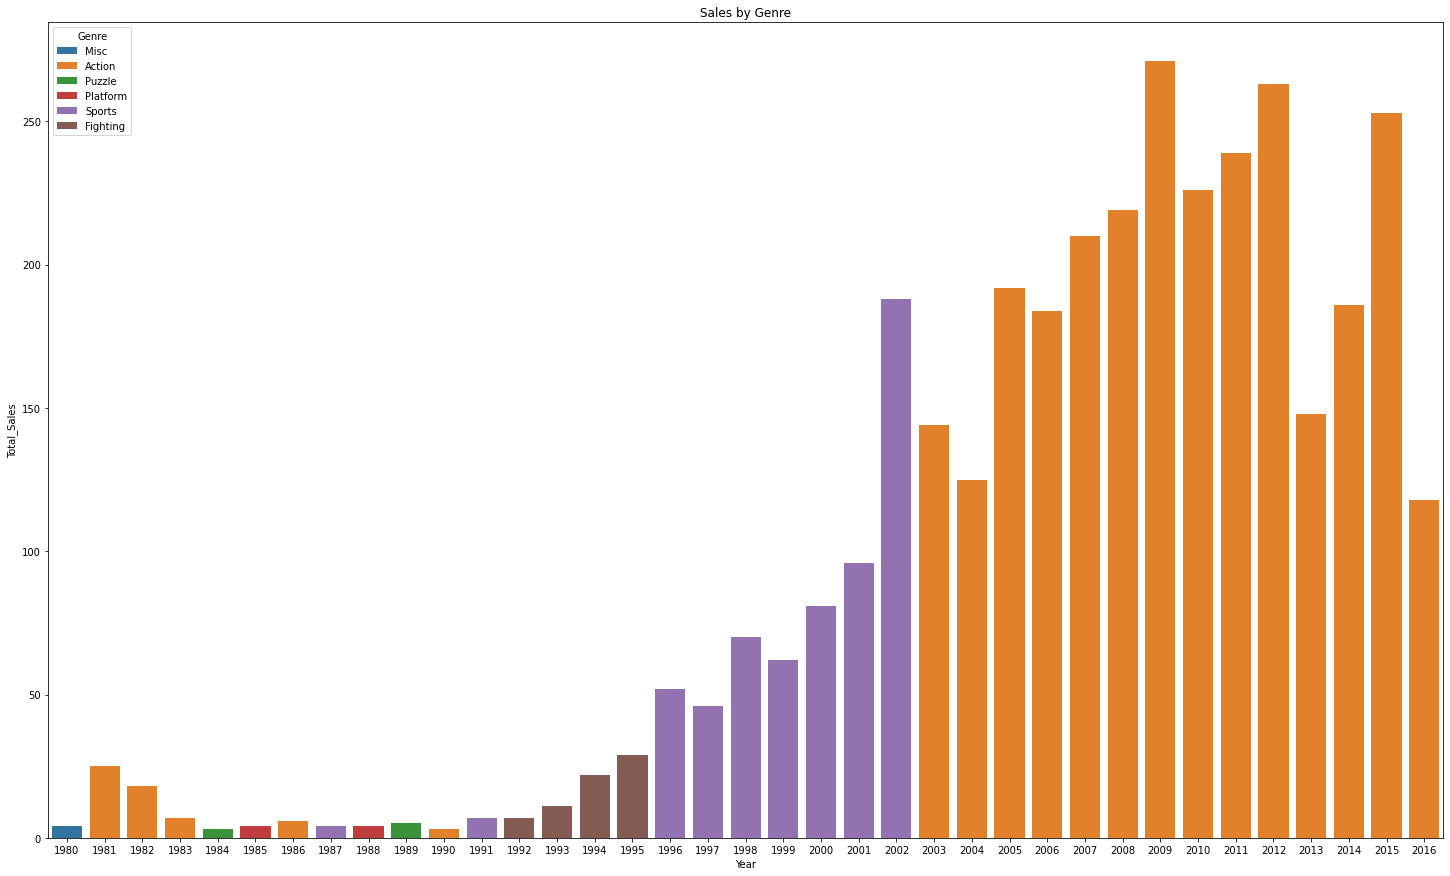

In [55]:
plt.figure(figsize=[25,15])
plt.title('Sales by Genre')
sns.barplot(data=year_count_max, x='Year', y='Total_Sales', hue='Genre',dodge=False)

In [56]:
Platform=df_copy.groupby(['Year','Platform'])['Total_Sales'].count().reset_index()
Platform_max = Platform.groupby(by=['Year'])['Total_Sales'].transform(max) == Platform['Total_Sales']
Platform_count_max = Platform[Platform_max].reset_index(drop=True)
Platform_count_max

,Year,Platform,Total_Sales
0,1980,2600,8
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1984,NES,13
5,1985,NES,11
6,1986,NES,19
7,1987,NES,10
8,1988,NES,11
9,1989,GB,10


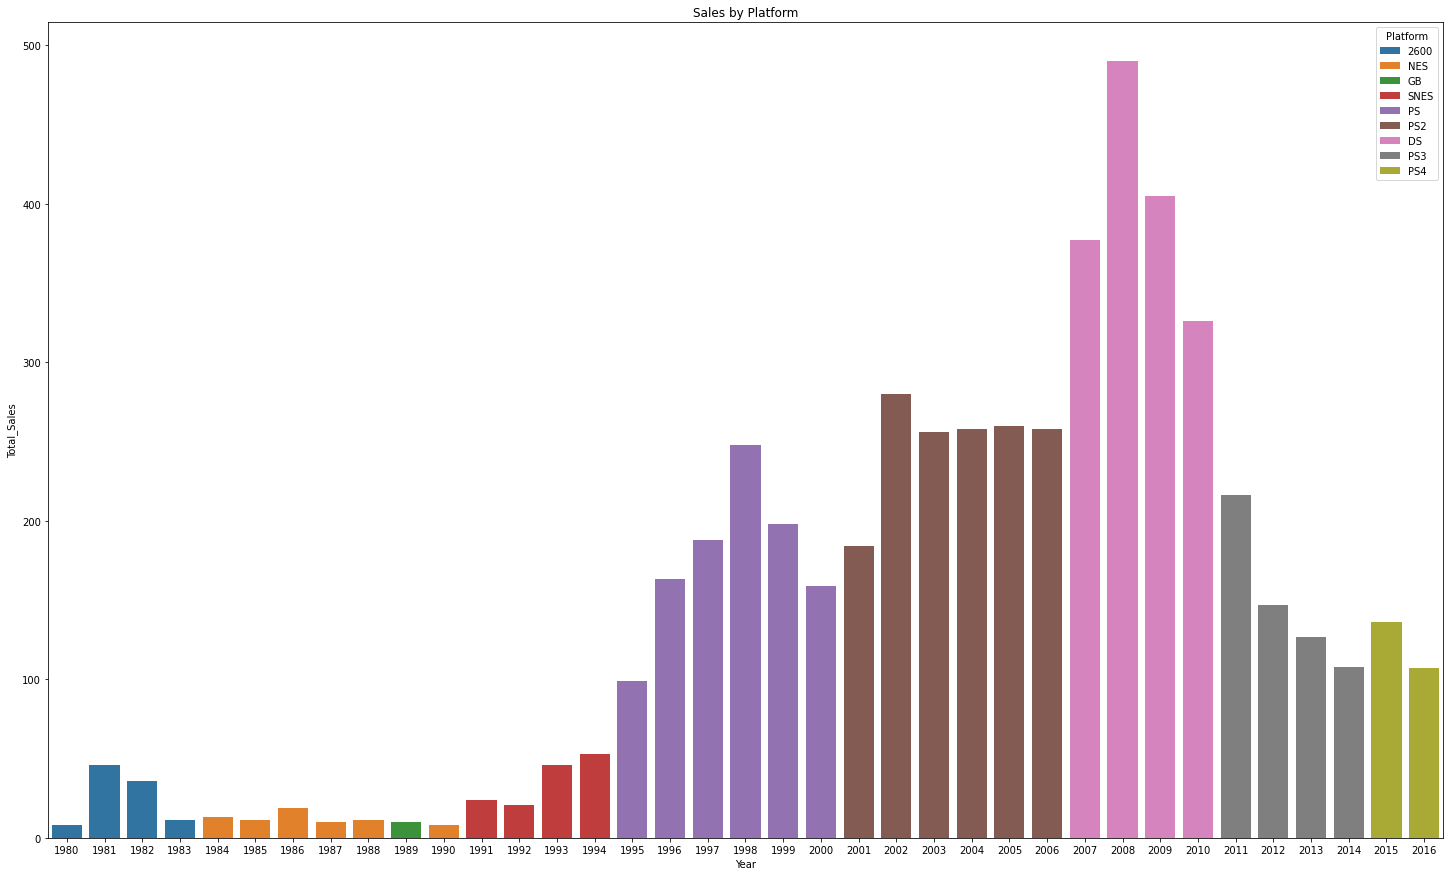

In [57]:
plt.figure(figsize=[25,15])
plt.title('Sales by Platform')
sns.barplot(data=Platform_count_max, x='Year', y='Total_Sales', hue='Platform',dodge=False)

In [ ]:
publisher=df_copy.groupby(['Year','Publisher'])['Total_Sales'].count().reset_index()
publisher_max = publisher.groupby(by=['Year'])['Total_Sales'].transform(max) == publisher['Total_Sales']
publisher_count_max = publisher[publisher_max].reset_index(drop=True)
publisher_count_max

,Year,Publisher,Total_Sales
0,1980,Activision,4
1,1980,Atari,4
2,1981,Atari,11
3,1982,Atari,14
4,1983,Atari,6
5,1983,Nintendo,6
6,1984,Nintendo,9
7,1985,Nintendo,7
8,1986,Nintendo,6
9,1987,Atari,4


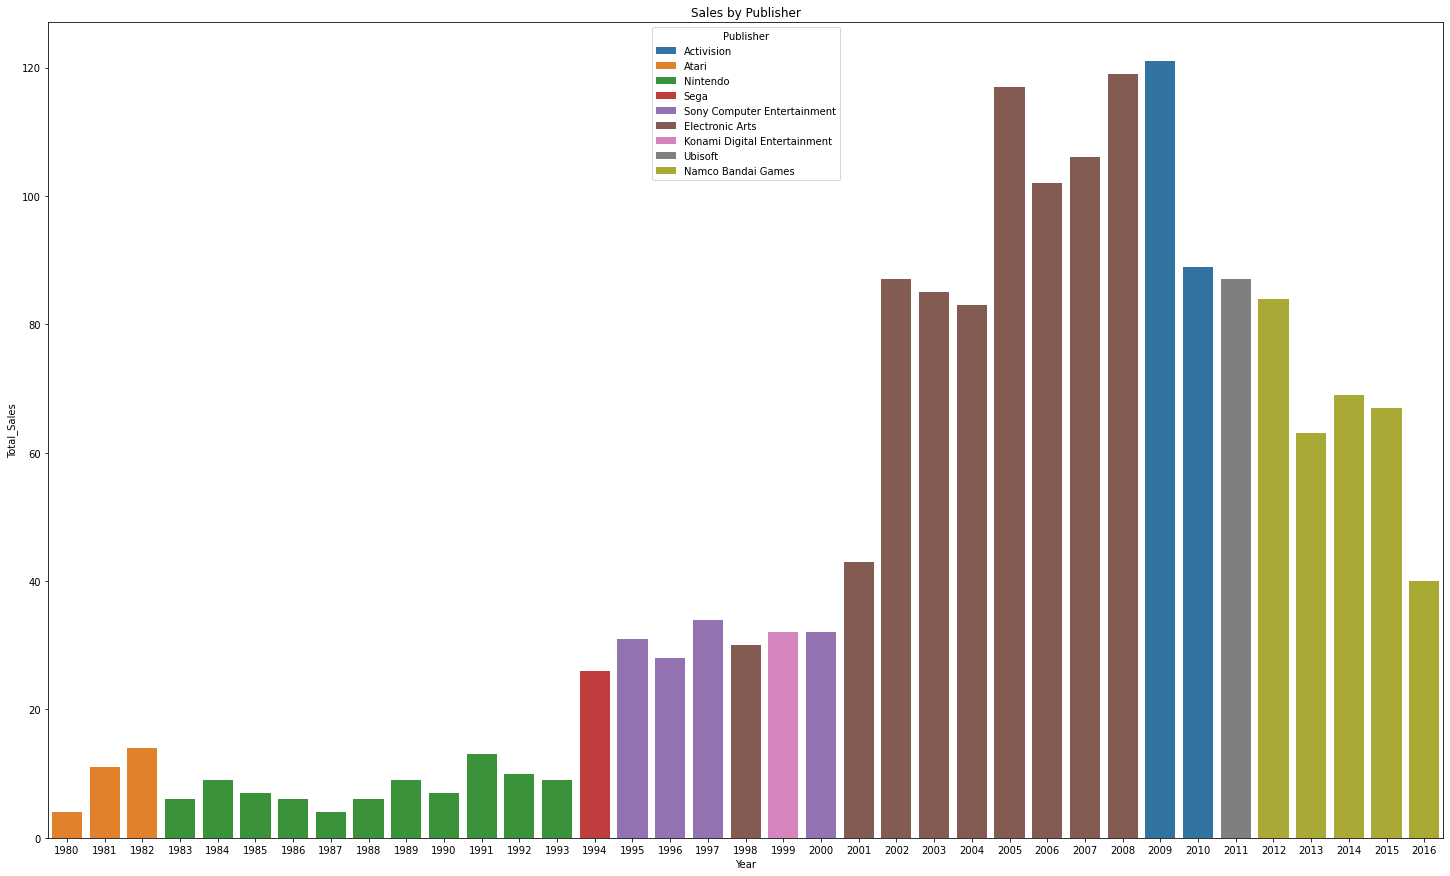

In [ ]:
plt.figure(figsize=[25,15])
plt.title('Sales by Publisher')
sns.barplot(data=publisher_count_max, x='Year', y='Total_Sales', hue='Publisher',dodge=False)

In [ ]:
# 전체 게임의 총매출 순위 30위 게임 나열 
topgame=df_copy.sort_values(by='Total_Sales',ascending=False).head(30).reset_index(drop=True)
topgame

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# 총매출 30위 게임 중 개발사별 매출 순위
# 플랫폼별 매출순위 
# 탑 30 게임 중 장르별 매출순위
publisher30=topgame.groupby('Publisher').sum().sort_values(by='Total_Sales',ascending=False)
platform30=topgame.groupby('Platform').sum().sort_values(by='Total_Sales',ascending=False)
top_genre_sum30=topgame.groupby('Genre').sum().sort_values(by='Total_Sales',ascending=False)
year_sum30=topgame.groupby('Year').sum().sort_values(by='Total_Sales',ascending=False)

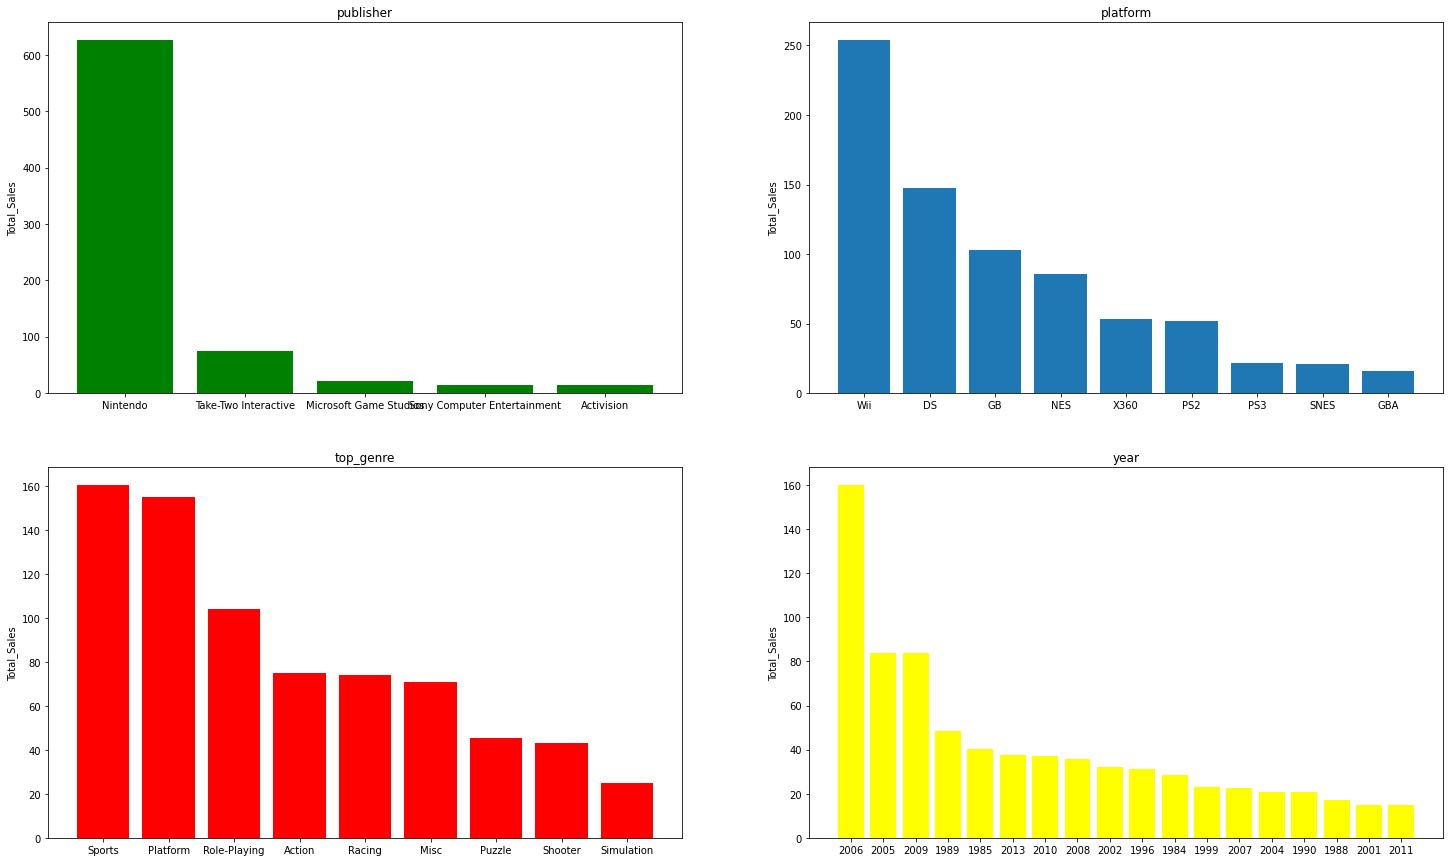

In [ ]:
plt.figure(figsize=[25,15])

plt.subplot(2, 2, 1)
plt.bar(publisher30.index, publisher30['Total_Sales'],color='Green')
plt.title('publisher')
plt.ylabel('Total_Sales')

plt.subplot(2, 2, 2)
plt.bar(platform30.index, platform30['Total_Sales'])
plt.title('platform')
plt.ylabel('Total_Sales')

plt.subplot(2, 2, 3)
plt.bar(top_genre_sum30.index, top_genre_sum30['Total_Sales'],color='red')
plt.title('top_genre')
plt.ylabel('Total_Sales')

plt.subplot(2, 2, 4)
plt.bar(year_sum30.index, year_sum30['Total_Sales'],color='yellow')
plt.title('year')
plt.ylabel('Total_Sales')
plt.show()

In [ ]:
# 북미에 출시할 게임 타겟을 확인 
# 액션 장르가 누적 매출이 가장 높음 
df_copy.groupby('Genre').sum().sort_values(by='NA_Sales',ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.59,183.99,1712.97
Sports,667.26,370.97,134.76,132.35,1305.34
Shooter,574.48,310.23,38.18,101.86,1024.75
Platform,445.38,200.63,130.53,51.45,827.99
Misc,394.73,208.15,104.18,72.64,779.70
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.89,56.73,901.47
Fighting,220.35,99.90,87.14,36.15,443.54
Simulation,181.16,112.99,63.54,31.30,388.99


In [ ]:
na_genre=df_copy.groupby(['Year','Genre'])['NA_Sales'].count().reset_index()
na_genre_max = na_genre.groupby(by=['Year'])['NA_Sales'].transform(max) == na_genre['NA_Sales']
na_genre_count_max = na_genre[na_genre_max].reset_index(drop=True)
na_genre_count_max

,Year,Genre,NA_Sales
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1984,Racing,3
6,1984,Shooter,3
7,1985,Platform,4
8,1985,Puzzle,4
9,1986,Action,6


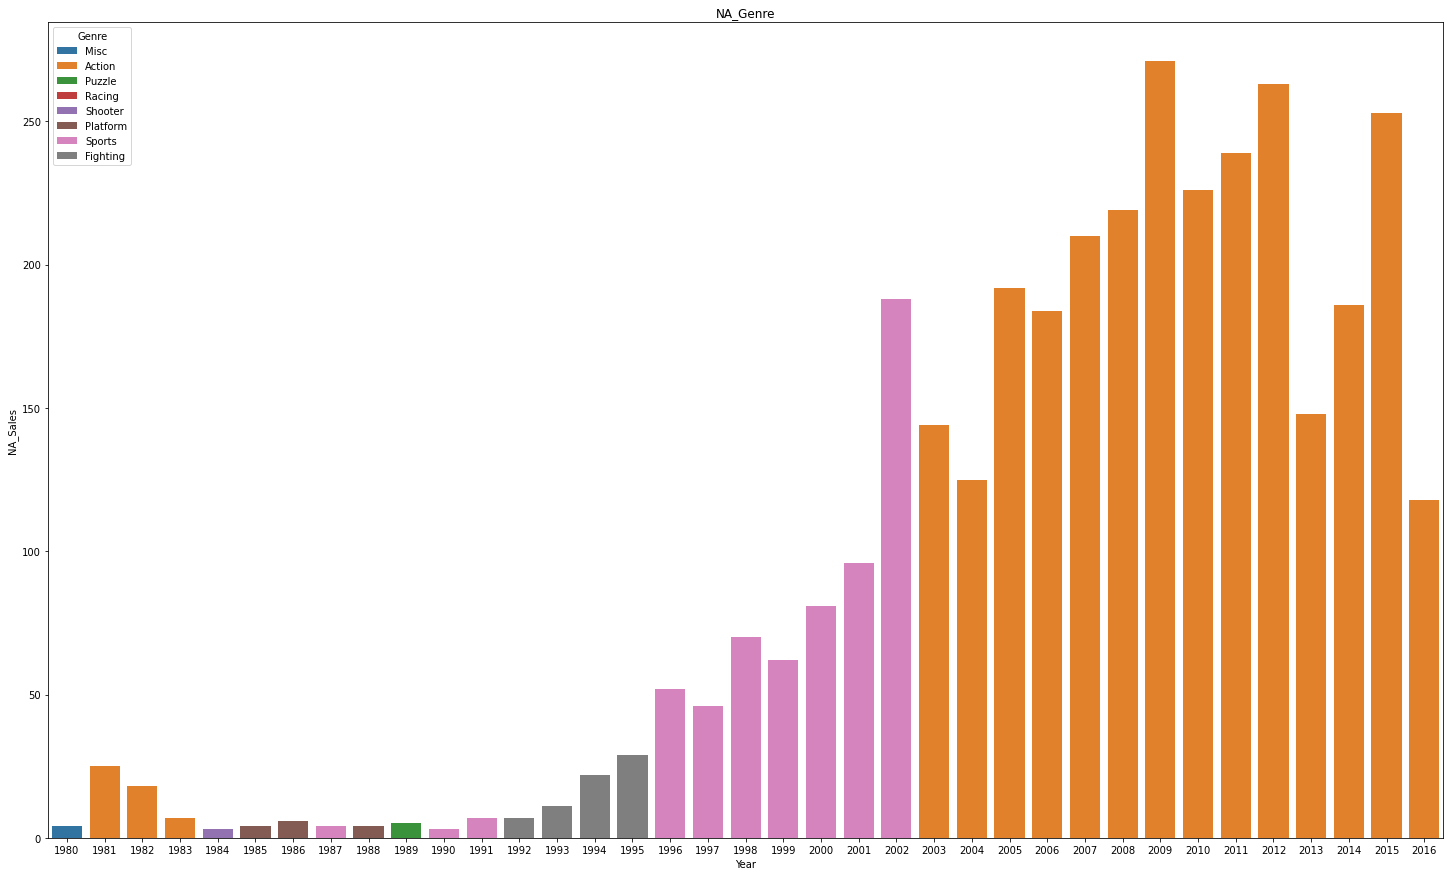

In [ ]:
plt.figure(figsize=[25,15])
plt.title('NA_Genre')
sns.barplot(data=na_genre_count_max, x='Year', y='NA_Sales', hue='Genre',dodge=False)

In [ ]:
df_copy[df_copy['Genre']=='Action'].sort_values(by='NA_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
1,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
4,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
5,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
6,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
7,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
8,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
9,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32


In [ ]:
plat16=df_copy[df_copy['Year']=='2016']['Platform'].value_counts()
plat16=plat16.to_frame()
plat16

,Platform
PS4,107
PSV,58
XOne,54
PC,38
3DS,35
PS3,32
WiiU,10
X360,8


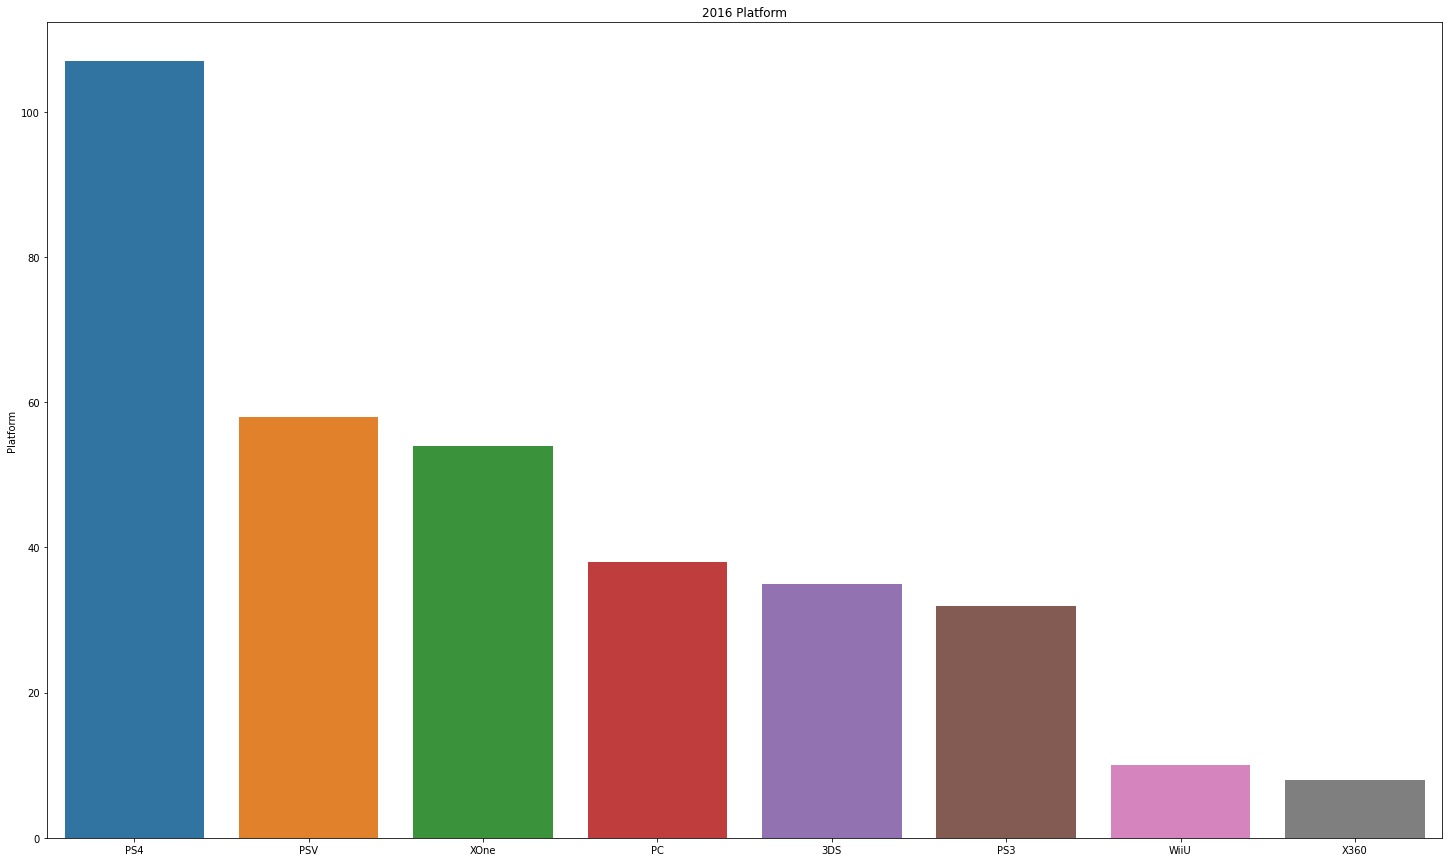

In [ ]:
plt.figure(figsize=[25,15])
plt.title('2016 Platform')
sns.barplot(data=plat16,x= plat16.index,y=plat16['Platform'])